In [107]:
import warnings
warnings.filterwarnings('ignore')

### Import required libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [109]:
data = pd.read_csv("collegePlace.csv")
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [110]:
unique_categories = data['Stream'].unique()

print(unique_categories)

['Electronics And Communication' 'Computer Science'
 'Information Technology' 'Mechanical' 'Electrical' 'Civil']


In [111]:
data.shape# size of the dataset

(2966, 8)

## Duplicate Checking

In [112]:
data.duplicated().sum()# total number of duplicate tuples

1829

> 1829 duplicate tuples present

In [113]:
# data.drop_duplicates(inplace=True)

In [114]:
data.duplicated().sum()# droping the duplicate tuples from the dataframe

1829

In [115]:
data.shape#size of dataset after removing the duplicate tuples

(2966, 8)

## Missing Values

In [116]:
data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [117]:
from sklearn.preprocessing import LabelEncoder

In [118]:
encoder=LabelEncoder()
data.Stream=encoder.fit_transform(data.Stream)

## Correlation
Used to show linear association between each feature

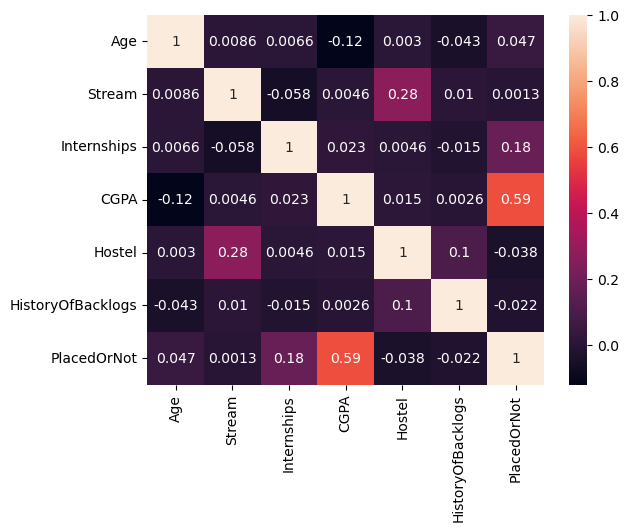

In [119]:
sns.heatmap(data.corr(), annot = True)
plt.show()

#### Interpretation
• **CGPA** has <u>moderate +ve assosciated</u> with getting placed\
• **Number of Internships** have <u>very weak +ve or no association</u> with getting placed\
• **Age** has <u>very weak +ve or no assosciation</u> with getting placed\
• **History** of backlogs has <u>very weak -ve or no association</u> in getting placed\
• **Staying in hostel** and **Stream** both are categorical data so no meaningful linear relationship can be formed with other relations\

but i would drop hostel feature ad it does not make much scence.

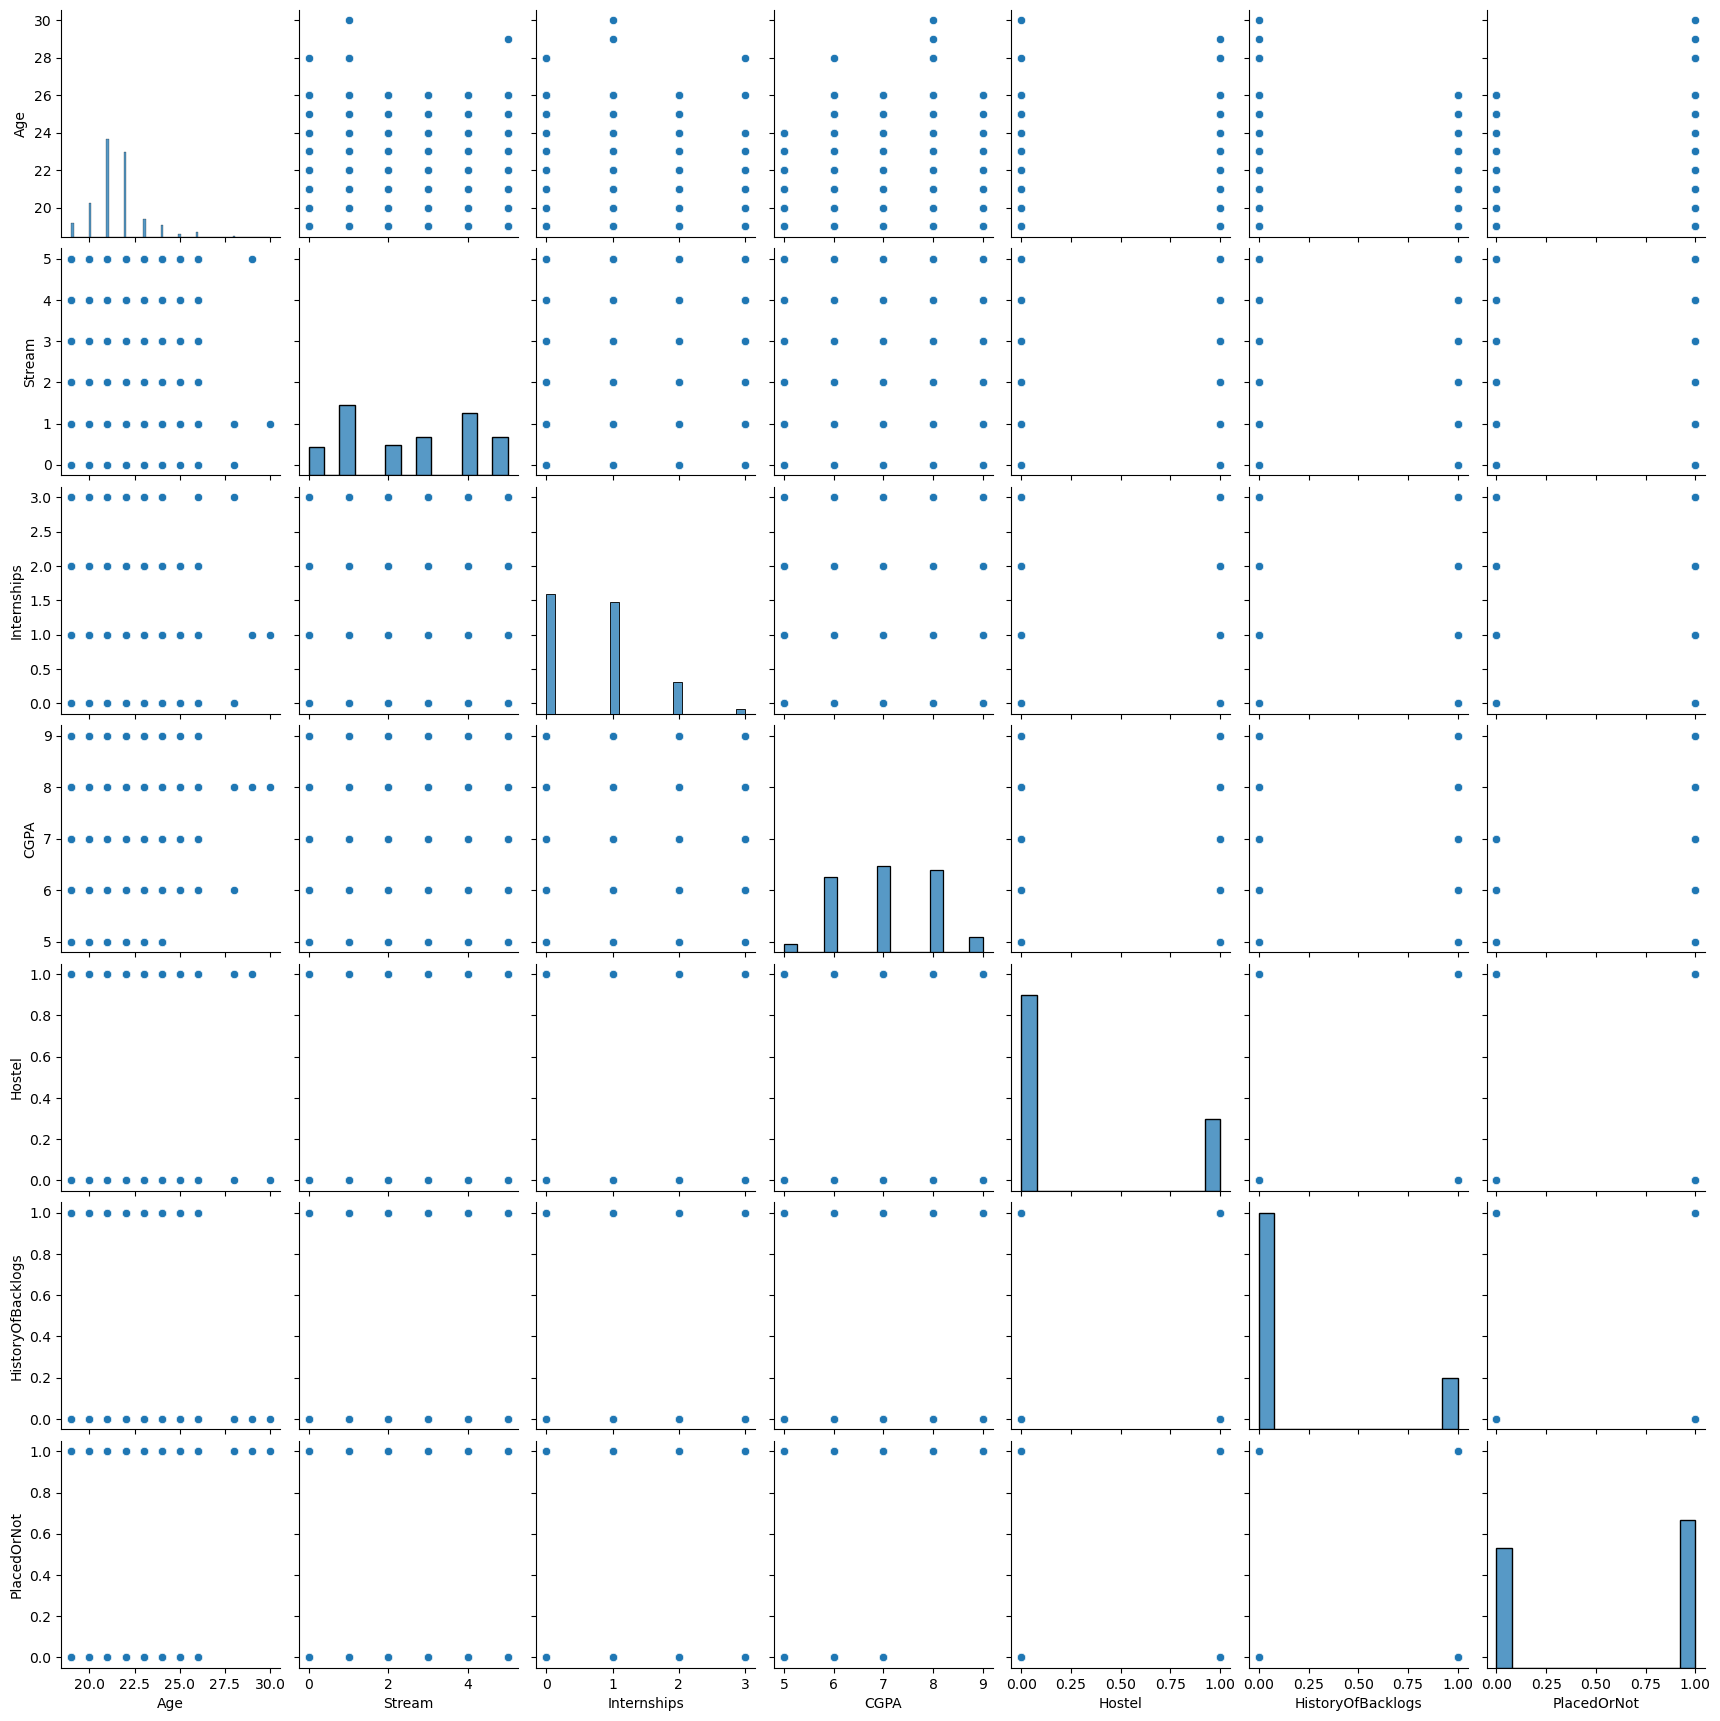

In [120]:
sns.pairplot(data)
plt.show()

In [121]:
data = data.drop('Hostel', axis='columns')

In [122]:
data

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,Male,3,1,8,1,1
1,21,Female,1,0,7,1,1
2,22,Female,4,1,6,0,1
3,21,Male,4,0,8,1,1
4,22,Male,5,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,Male,4,0,7,0,0
2962,23,Male,5,1,7,0,0
2963,22,Male,4,1,7,0,0
2964,22,Male,1,1,7,0,0


In [123]:
print(data.loc[11])

Age                      22
Gender               Female
Stream                    2
Internships               1
CGPA                      8
HistoryOfBacklogs         1
PlacedOrNot               1
Name: 11, dtype: object


## Encoding the data

In [124]:
data.Gender=encoder.fit_transform(data.Gender)
data.Gender

0       1
1       0
2       0
3       1
4       1
       ..
2961    1
2962    1
2963    1
2964    1
2965    1
Name: Gender, Length: 2966, dtype: int32

## Spliting the dataset into training and testing parts

In [125]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [126]:
X

array([[22,  1,  3,  1,  8,  1],
       [21,  0,  1,  0,  7,  1],
       [22,  0,  4,  1,  6,  0],
       ...,
       [22,  1,  4,  1,  7,  0],
       [22,  1,  1,  1,  7,  0],
       [23,  1,  0,  0,  8,  0]], dtype=int64)

In [127]:
y

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20, random_state=2)

In [129]:
print('xtrain :',X_train.shape)
print('xtest:', X_test.shape)
print('\n ytrain:',y_train.shape)
print('ytest:',y_test.shape)

xtrain : (2372, 6)
xtest: (594, 6)

 ytrain: (2372,)
ytest: (594,)


In [130]:
print(X_test)

[[22  1  4  0  7  0]
 [20  1  5  1  7  0]
 [22  1  1  0  8  1]
 ...
 [24  1  3  0  6  0]
 [22  0  3  0  8  0]
 [22  1  0  0  6  0]]


In [131]:
print(y_test)

[0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1
 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0
 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1
 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0
 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1
 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1
 0 0 0 0 1 0 1 1 1 0 0 0 

## Model Building

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()

In [26]:
# fitting the model
LogR.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred_train_LR=LogR.predict(X_train)

In [28]:
score = LogR.score(X_test, y_test)
print(score)

0.7542087542087542


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train_LR)

0.7723440134907251

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train_LR)

array([[ 781,  265],
       [ 275, 1051]], dtype=int64)

In [31]:
y_pred_test_LR=LogR.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred_test_LR)

0.7542087542087542

In [33]:
confusion_matrix(y_test, y_pred_test_LR)

array([[198,  83],
       [ 63, 250]], dtype=int64)

### Naive Bayes Classifier

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [35]:
gnb.fit(X_train, y_train)

GaussianNB()

In [36]:
y_pred_train_NB=gnb.predict(X_train)

In [37]:
accuracy_score(y_train, y_pred_train_NB)

0.8145025295109612

In [38]:
confusion_matrix(y_train, y_pred_train_NB)

array([[ 894,  152],
       [ 288, 1038]], dtype=int64)

In [39]:
y_pred_test_NB=gnb.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred_test_NB)

0.803030303030303

In [41]:
confusion_matrix(y_test, y_pred_test_NB)

array([[228,  53],
       [ 64, 249]], dtype=int64)

### Support Vector Machine

In [42]:
from sklearn.svm import SVC
svc = SVC()

In [43]:
svc.fit(X_train, y_train)

SVC()

In [44]:
y_pred_train_SVM=svc.predict(X_train)

In [45]:
accuracy_score(y_train, y_pred_train_SVM)

0.7668634064080945

In [46]:
confusion_matrix(y_train, y_pred_train_SVM)

array([[ 804,  242],
       [ 311, 1015]], dtype=int64)

In [47]:
y_pred_test_SVM=svc.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred_test_SVM)

0.7643097643097643

In [49]:
confusion_matrix(y_test, y_pred_test_SVM)

array([[208,  73],
       [ 67, 246]], dtype=int64)

### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [51]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
y_pred_train_DTC=clf.predict(X_train)

In [53]:
accuracy_score(y_train, y_pred_train_DTC)

0.9190556492411467

In [54]:
confusion_matrix(y_train, y_pred_train_DTC)

array([[1016,   30],
       [ 162, 1164]], dtype=int64)

In [55]:
y_pred_test_DTC=clf.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred_test_DTC)

0.8636363636363636

In [57]:
confusion_matrix(y_test, y_pred_test_DTC)

array([[250,  31],
       [ 50, 263]], dtype=int64)

### Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [59]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
y_pred_train_RF=rf.predict(X_train)

In [61]:
accuracy_score(y_train, y_pred_train_RF)

0.9190556492411467

In [62]:
confusion_matrix(y_train, y_pred_train_RF)

array([[1003,   43],
       [ 149, 1177]], dtype=int64)

In [63]:
y_pred_test_RF=rf.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred_test_RF)

0.8703703703703703

In [65]:
confusion_matrix(y_test, y_pred_test_RF)

array([[253,  28],
       [ 49, 264]], dtype=int64)

### K Nearest Neighbour

In [66]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=2)

In [67]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [68]:
y_pred_train_KNN=knn.predict(X_train)

In [69]:
accuracy_score(y_train, y_pred_train_KNN)

0.8996627318718381

In [70]:
confusion_matrix(y_train, y_pred_train_KNN)

array([[1012,   34],
       [ 204, 1122]], dtype=int64)

In [71]:
y_pred_test_KNN=knn.predict(X_test)

In [72]:
accuracy_score(y_test, y_pred_test_KNN)

0.8703703703703703

In [73]:
confusion_matrix(y_test, y_pred_test_KNN)

array([[262,  19],
       [ 58, 255]], dtype=int64)

### XGBoost Classifier

In [74]:
! pip install xgboost


[notice] A new release of pip available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 70.9/70.9 MB 3.5 MB/s eta 0:00:00


In [75]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [76]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [77]:
y_pred_train_XGB=xgb.predict(X_train)

In [78]:
accuracy_score(y_train, y_pred_train_XGB)

0.9148397976391232

In [79]:
confusion_matrix(y_train, y_pred_train_XGB)

array([[1014,   32],
       [ 170, 1156]], dtype=int64)

In [80]:
y_pred_test_XGB = xgb.predict(X_test)

In [81]:
accuracy_score(y_test, y_pred_test_XGB)

0.8737373737373737

In [82]:
confusion_matrix(y_test, y_pred_test_XGB)

array([[256,  25],
       [ 50, 263]], dtype=int64)

### Max Voting Ensemble

In [83]:
from sklearn.ensemble import VotingClassifier

vote = VotingClassifier(
    estimators=[
        ('LogR', LogR),
        ('gnb', gnb),
        ('svc', svc),
        ('clf', clf),
        ('rf', rf),
        ('knn', knn),
        ('xgb', xgb)
    ],
    voting='hard'
)

In [84]:
vote.fit(X_train, y_train)

VotingClassifier(estimators=[('LogR', LogisticRegression()),
                             ('gnb', GaussianNB()), ('svc', SVC()),
                             ('clf', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier(n_neighbors=2)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                 

In [85]:
y_pred_train_MV=vote.predict(X_train)

In [86]:
accuracy_score(y_train, y_pred_train_MV)

0.9127318718381113

In [87]:
confusion_matrix(y_train, y_pred_train_MV)

array([[1012,   34],
       [ 173, 1153]], dtype=int64)

In [88]:
y_pred_test_MV=vote.predict(X_test)

In [89]:
accuracy_score(y_test, y_pred_test_MV)

0.8602693602693603

In [90]:
confusion_matrix(y_test, y_pred_test_MV)

array([[252,  29],
       [ 54, 259]], dtype=int64)

In [91]:
import pickle

In [92]:
pickle.dump(vote,open("placed.pkl","wb"))